In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Python matplotlib 配置中文字体

- 下载中文字体（黑体，下载对应系统的版本，Unix系统下载For MAC版）
 > [https://www.fontpalace.com/font-details/SimHei/](https://www.fontpalace.com/font-details/SimHei/)
- 桌面版系统，解压之后直接在系统中安装好，服务器版系统解压好备用
- 在Python中运行下面代码，找到matplotlib字体文件夹

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

- 字体文件夹路径为xxx/**matplotlib/mpl-data/fonts/ttf**，将SimHei.ttf拷贝到ttf文件夹下
- 修改配置文件matplotlibrc，路径为第三步查询到的路径，修改下面三项配置
```python
# 取消注释
font.family      : sans-serif     
# 取消注释 添加黑体 SimHei,
font.sans-serif   : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
# 取消注释 设置为 False
axes.unicode_minus : False，#作用就是解决负号'-'显示为方块的问题
```
- 最重要的一步，**重载配置**，在Python中运行下面代码

In [3]:
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下

- 创建plt对象时，指定使用SimHei字体，就能正常显示中文了
```python
plt.rcParams['font.sans-serif']=['SimHei']
```

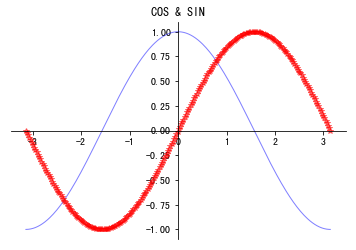

In [4]:
x=np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s=np.cos(x),np.sin(x)
plt.figure(1)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.plot(x,c, color="blue", linewidth=1.0, linestyle="-", label="COS", alpha=0.5)
plt.plot(x,s, "r*", label="SIN", alpha=0.5)
plt.title("COS & SIN")
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left") 
plt.show()

### 简单资产增长模拟

为直观的查看资产增长情况，进行资产增长模拟，就绘制了一个简单的模拟增长折线图，参数可以根据自己的实际情况填写，预估理想情况下自己的财富增长
下面给定几个财富增长的参考(平均年化收益率)


| 平均年化增长率 |                      投资种类                       |              是否产生亏损               | 适用人群 |
| :------------: | :-------------------------------------------------: | :-------------------------------------: | :------: |
|       3%       |                 余额宝等货币基金、银行定期                  |               不产生亏损                |  稳健型  |
|       5%       |              债券、货币基金、银行定期               |          可能产生亏损          |  稳健型  |
|       7%       |    少量（股票、股指基金）,多量（债券、货币基金）    |            可能产生较小亏损             |  平衡型  |
|      10%       | 多量（股票、股指基金、期货）,少量（债券、货币基金） | 可能产生较大亏损 |  成长型  |


-  3% - 存余额宝等货币型基金、银行定期

-  5% - 债券、债券型基金 - 不保证本金，可能亏损

-  7% - 股票、股票型基金、债券、债券型基金、货币型基金等混合，如能承受资产波动，建议少量配置股票、股票型基金，收益也相对提高 - 不保证本金，可能有较小亏损

- 10% - 上一个的混合，股票、股票型基金 配置比例更好，可能会有较大亏损，但收益也相对更高，更适合中长期资产理财

PS：对于普通人，平均年化增长率能达到10%，就已经很不错了，股神巴菲特也才20%，在牛市中赚钱很简单，难的是如何在熊市中守住本金，不把牛市赚的钱亏回去。

In [5]:
def calculate(plt, color="b--", times=10, year=[2019], stock=[0], stock_growth_rate=0.1, 
              income=[10], income_growth_rate=0.1, label="stock"):
    """资产增长计算.

    给定年份、现资产、理想情况下存量资产增长率、现净收入、理想情况下净收入增长率，计算资产增长情况

    Args:
        plt: 绘图对象
        color: 点线的颜色及类型
        times: 计算年限
        year: 预设的年份数据
        stock: 预设的存量资产数据
        stock_growth_rate: 预设的资产增长率
        income: 预设的净收入数据
        income_growth_rate: 预设的净收入增长率
        label: 标签

    Returns:
        plt

        返回原绘图对象
    """
    stock_income = [0]
    for i in range(times):
        year.append(year[-1] + 1)

        # 财富增长
        stock.append(stock[-1] * (1+stock_growth_rate) + income[-1])

        # 收入增长
        income.append(income[-1] * (1+income_growth_rate))
        
        # 财富自增长收入
        stock_income.append(stock[-1] * stock_growth_rate)

    plt.plot(year, stock, color, marker='.', linewidth=1, label=label + "-总资产")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.plot(year, income, color, marker='*', linewidth=1, label=label+"-净收入")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
    plt.plot(year, stock_income, color, marker='o', linewidth=1, label=label+"-财富自增长收入")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）

    for xy in zip(year, stock):
        plt.annotate("%s" % int(xy[1]), xy=xy, xytext=(-10, 5), textcoords='offset points')

    for xy in zip(year, income):
        plt.annotate("%s" % int(xy[1]), xy=xy, xytext=(-10, 5), textcoords='offset points')
        
    for xy in zip(year, stock_income):
        plt.annotate("%s" % int(xy[1]), xy=xy, xytext=(-10, 5), textcoords='offset points')
    
    return plt

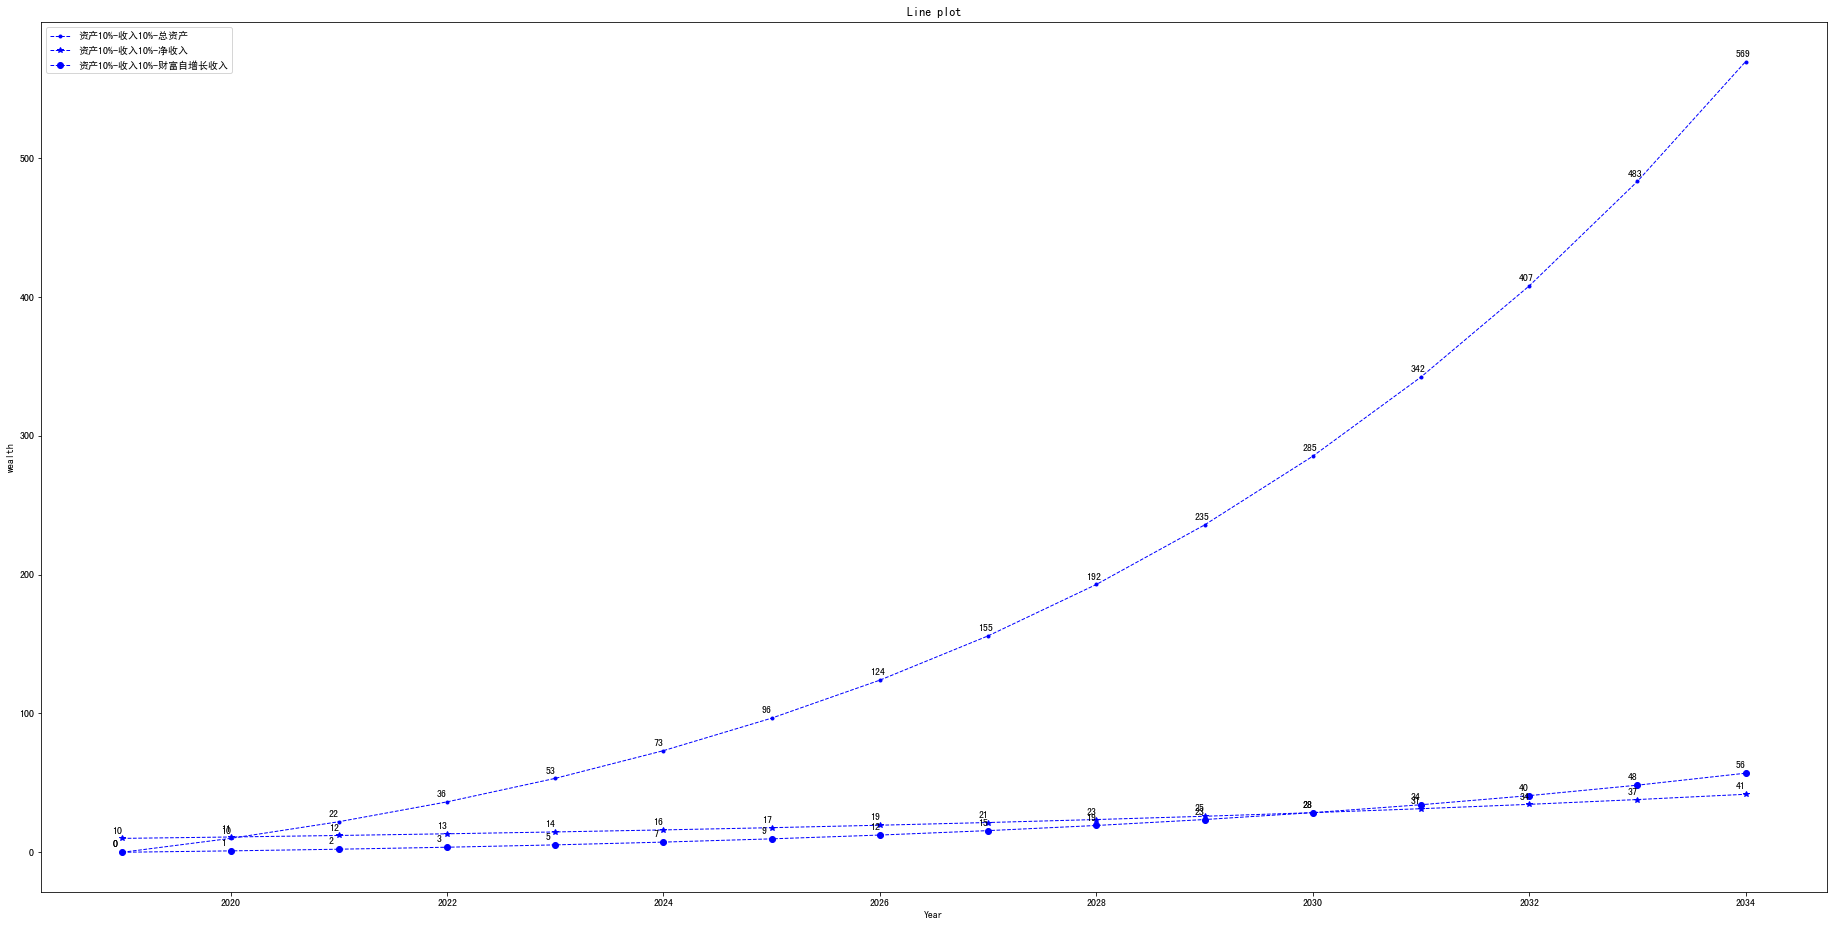

In [10]:
times = 15  # 计算年限
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(32,16)) #创建绘图对象
plt = calculate(plt, "b--", times=times, year=[2019], stock=[0], stock_growth_rate=0.1, income=[10], income_growth_rate=0.1, label="资产10%-收入10%")
# plt = calculate(plt, "r--", times=times, year=[2019], stock=[0], stock_growth_rate=0.05, income=[10], income_growth_rate=0.2, label="资产10%-收入20%")
# plt = calculate(plt, "g--", times=times, year=[2019], stock=[0], stock_growth_rate=0.13, income=[10], income_growth_rate=0.1, label=u"资产13%-收入10%")
# plt = calculate(plt, "p--", times=times, year=[2019], stock=[0], stock_growth_rate=0.13, income=[10], income_growth_rate=0.2, label=u"资产13%-收入20%")
plt.xlabel("Year") #X轴标签
plt.ylabel("wealth")  #Y轴标签
plt.title("Line plot") #图标题
plt.legend()
# plt.show()  #显示图
plt.savefig("line.jpg") #保存图

根据上图结果，理想情况下，假如今年存款为0，财富增长率为10%，净收入为10W，净收入增长率也为10%，大概在10年后，理财能带来和工作净收入一样的资产（未考虑净收入是总工资收入Cover掉支出的一部分）
前期努力工作，积累本金，争取把增长率提高到20%以上，后期提高理财收益率，财富增长最快。